In [1]:
import pandas as pd
import numpy as np
import csv
import json
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from sklearn.preprocessing import MinMaxScaler
import os

# Download Data

## Pairwise data

In [3]:
input_categories = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
def average_pairwise(label):
    path = './data/japanese/similarity/pairwise_distance_'
    v1 = pd.read_csv(path+label+input_categories[0]+'.csv',header=None)
    v2 = pd.read_csv(path+label+input_categories[1]+'.csv',header=None)
    v3 = pd.read_csv(path+label+input_categories[2]+'.csv',header=None)
    v4 = pd.read_csv(path+label+input_categories[3]+'.csv',header=None)
    v5 = pd.read_csv(path+label+input_categories[4]+'.csv',header=None)
    v6 = pd.read_csv(path+label+input_categories[5]+'.csv',header=None)
    v7 = pd.read_csv(path+label+input_categories[6]+'.csv',header=None)
    v8 = pd.read_csv(path+label+input_categories[7]+'.csv',header=None)
    v9 = pd.read_csv(path+label+input_categories[8]+'.csv',header=None)
    v10 = pd.read_csv(path+label+input_categories[9]+'.csv',header=None)
    average = pd.concat([v1, v2, v3, v4, v5, v6, v7, v8, v9, v10]).groupby(level=0).mean().fillna(0)
    average.to_csv('./output/japan/similarity/'+label+'_average_distance.csv',index=False)
for i in range(6):
    average_pairwise(str(i))

## Feature Data
A utility function to read the feature annotations

In [4]:
def get_files(group):
    entries = os.listdir('./data/japanese/evaluation/')
    files = [entry for entry in entries if str(group) in entry]
    return files

In [5]:
PATH = './data/japanese/evaluation/evaluation_'

def format_feature(group, participant):
    df = pd.read_csv(PATH+str(group)+participant+'.csv', header=None, index_col=0)
    if 14 in df.columns:
        df = df.drop(14, axis=1)
    return df

## Feature Distance matrix
A utility function to convert the songwise features into a distance matrix within a 0 to 1 range

In [6]:
def save_full_feature_distance(participant):
    full_matrix = format_feature(0, participant)
    for i in range(1,6):
            full_matrix = np.concatenate([full_matrix, format_feature(i, participant)], axis=0)
    distance_matrix = pd.DataFrame(get_feature_distance(full_matrix))
    distance_matrix.to_csv('./output/japan/feature/'+participant+'_feature.csv', index=False)

In [8]:
def get_feature_distance(input_data):
    data = squareform(pdist(input_data, metric='euclidean'))
    scaler = MinMaxScaler()
    scaler.fit(data)
    return scaler.transform(data)

In [9]:
for i in range(6):
    files = get_files(i)
    for file in files:
        participant_id = file.split('.')[0][-1]
        data = format_feature(i, participant_id)
        distance = pd.DataFrame(get_feature_distance(data))
        distance.to_csv('./output/japan/feature/'+str(i)+participant_id+'_distance.csv', index=False)

## Get feature distances

In [10]:
feature_names = ['Ornamentation', 'Grooviness', 'Familiarity', 'Liking', 'Consonance', 'Valence', 'Excitement', 'Vocal Range', 'Sound Quality', 'Tempo', 'Rhythmic Regularity', 'Vocal Tension', 'Vocal Texture']

def get_individual_feature(feature_index, participant):
    feature_vector = format_feature(0, participant)[feature_index]
    label = feature_names[feature_index-1].lower().replace(' ', '_')
    for i in range(1,6):
        feature_vector = np.concatenate([feature_vector, format_feature(i, participant)[[feature_index]]], axis=None)
    feature_df = pd.DataFrame(feature_vector, columns=[feature_index])
    feature_distance = pd.DataFrame(get_feature_distance(feature_df))
    feature_distance.to_csv('./output/japan/feature/'+label+'_'+participant+'.csv', index=False)
for cluster in input_categories:
    for i in range(1, len(feature_names)):
        get_individual_feature(i, cluster)

## Get Average Feature Distance Matrix

In [11]:
input_categories = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
def average_distance_matrix(label):
    path = './output/japan/feature/'
    v1 = pd.read_csv(path+label+'_'+input_categories[0]+'.csv')
    v2 = pd.read_csv(path+label+'_'+input_categories[1]+'.csv')
    v3 = pd.read_csv(path+label+'_'+input_categories[2]+'.csv')
    v4 = pd.read_csv(path+label+'_'+input_categories[3]+'.csv')
    v5 = pd.read_csv(path+label+'_'+input_categories[4]+'.csv')
    v6 = pd.read_csv(path+label+'_'+input_categories[5]+'.csv')
    v7 = pd.read_csv(path+label+'_'+input_categories[6]+'.csv')
    v8 = pd.read_csv(path+label+'_'+input_categories[7]+'.csv')
    v9 = pd.read_csv(path+label+'_'+input_categories[8]+'.csv')
    v10 = pd.read_csv(path+label+'_'+input_categories[9]+'.csv')
    average = pd.concat([v1, v2, v3, v4, v5, v6, v7, v8, v9, v10]).groupby(level=0).mean()
    average.to_csv('./output/japan/feature/'+label+'_average.csv', index=False)
    
for i in range(1, len(feature_names)+1):
    label = feature_names[i-1].lower().replace(' ', '_')
    average_distance_matrix(label)

## Correlation

In [35]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
PATH = './output/japan/similarity/'

def flatten_distance_matrix(numpy_array):
    arr = []
    for i in range(5):
        for j in range(5):
            if i<j:
                arr.append(numpy_array[i,j])
    return arr
full_partial = []
for i in range(6):
    npar = pd.read_csv(PATH+str(i)+'_average_distance.csv').to_numpy()
    x = flatten_distance_matrix(npar)
    full_partial.extend(x)

In [24]:
PATH = './data/indian/similarity/'

indian_partial = []
for i in range(6):
    npar = pd.read_csv(PATH+'hideo-india.csv', header=None).to_numpy()
    x = flatten_distance_matrix(npar[i:i+5, i:i+5])
    indian_partial.extend(x)

In [27]:
r, p = stats.pearsonr(full_partial, indian_partial)
print(round(r, 2), round(p, 2))

-0.23 0.08


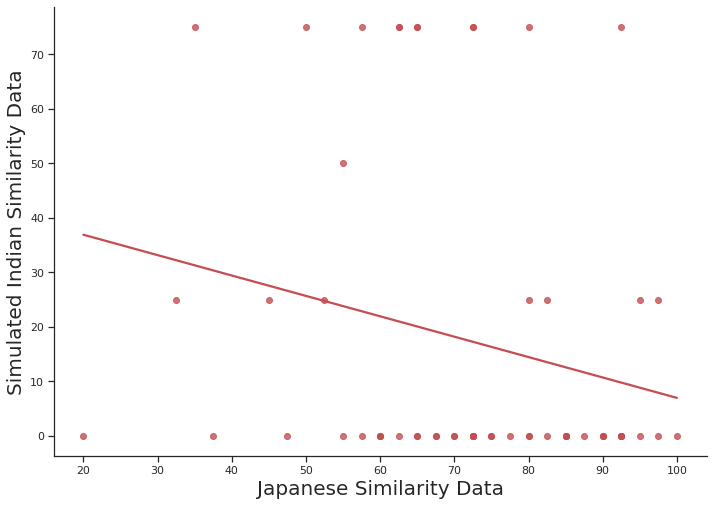

In [42]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('ticks')
p = sns.regplot(x=full_partial, y=indian_partial, ci=None, color="r")
p.set_xlabel("Japanese Similarity Data", fontsize = 20)
p.set_ylabel("Simulated Indian Similarity Data", fontsize = 20)
sns.despine()  

In [131]:
PATH = './output/japan/feature/'
feature_names = ['Ornamentation', 'Grooviness', 'Familiarity', 'Liking', 'Consonance', 'Valence', 'Excitement', 'Vocal Range', 'Sound Quality', 'Tempo', 'Rhythmic Regularity', 'Vocal Tension', 'Vocal Texture']
for i in range(1, len(feature_names)+1):
    label = feature_names[i-1].lower().replace(' ', '_')
    npar = pd.read_csv(PATH+label+'_average.csv').to_numpy()
    flattened_feature = []
    for j in range(6):
        flattened = flatten_distance_matrix(npar[j:j+5, j:j+5])
        flattened_feature.extend(flattened)
    r, p = stats.pearsonr(flattened_feature, full_partial)
    print(round(r,2), round(p,2))

0.05 0.71
0.07 0.59
-0.05 0.72
0.04 0.78
0.08 0.55
0.14 0.29
0.11 0.39
0.15 0.26
0.19 0.16
0.02 0.89
0.24 0.07
0.07 0.61
-0.05 0.68


In [14]:
full_partial

[55.0,
 85.0,
 35.0,
 45.0,
 57.5,
 80.0,
 85.0,
 72.5,
 85.0,
 82.5,
 92.5,
 95.0,
 92.5,
 37.5,
 57.5,
 60.0,
 90.0,
 32.5,
 97.5,
 87.5,
 90.0,
 77.5,
 60.0,
 75.0,
 52.5,
 67.5,
 92.5,
 72.5,
 90.0,
 82.5,
 97.5,
 92.5,
 100.0,
 85.0,
 95.0,
 20.0,
 60.0,
 92.5,
 67.5,
 65.0,
 62.5,
 72.5,
 70.0,
 80.0,
 47.5,
 75.0,
 65.0,
 80.0,
 62.5,
 50.0,
 72.5,
 72.5,
 70.0,
 72.5,
 62.5,
 65.0,
 65.0,
 72.5,
 80.0,
 55.0]